In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
from jupyter_helpers.jupyter_helpers.all import *
from helpers import *

# Best Movie By Year

In [7]:
best_movie_by_year_df = best_movie_by_year_df.sort_values('RELEASE_YEAR').reset_index().drop(columns=['level_0', 'index'])

print(best_movie_by_year_df.shape)
best_movie_by_year_df.head()

(49, 5)


,TITLE,RELEASE_YEAR,SCORE,MAIN_GENRE,MAIN_PRODUCTION
0,White Christmas,1954,7.5,romance,US
1,The Guns of Navarone,1961,7.5,war,US
2,My Fair Lady,1964,7.8,drama,US
3,Bonnie and Clyde,1967,7.7,drama,US
4,Dirty Harry,1971,7.7,thriller,US


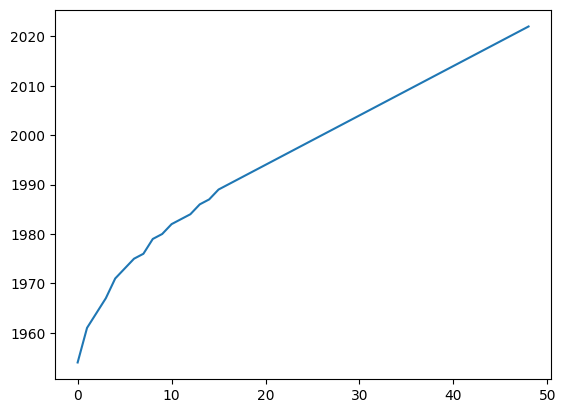

In [8]:
plt.plot(best_movie_by_year_df.index, best_movie_by_year_df.RELEASE_YEAR)

In [9]:
# Recent Best Movies
best_movie_by_year_df.iloc[-10:][::-1]

,TITLE,RELEASE_YEAR,SCORE,MAIN_GENRE,MAIN_PRODUCTION
48,The Tinder Swindler,2022,7.2,crime,GB
47,Bo Burnham: Inside,2021,8.7,comedy,US
46,David Attenborough: A Life on Our Planet,2020,9.0,documentary,GB
45,Dave Chappelle: Sticks & Stones,2019,8.4,comedy,US
44,Andhadhun,2018,8.2,thriller,IN
43,Bāhubali 2: The Conclusion,2017,8.2,fantasy,IN
42,Dangal,2016,8.4,action,IN
41,Drishyam,2015,8.2,thriller,IN
40,Queen,2014,8.2,drama,IN
39,Rush,2013,8.1,drama,US


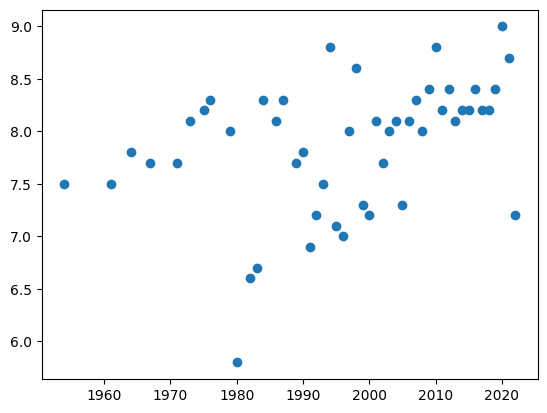

In [10]:
# Highest Scores
plt.scatter(best_movie_by_year_df.RELEASE_YEAR, best_movie_by_year_df.SCORE)

That's interesting... looks like scores have been rising over the year.
Some reasons that come to mind for this:
- More movies = people have a better perspective on what's good or bad
- Expectations of movies becomes normalized over time as more movies come out
- The content of the movies might have moved closer towards what people want versus what governments / studios want

<AxesSubplot: xlabel='MAIN_GENRE'>

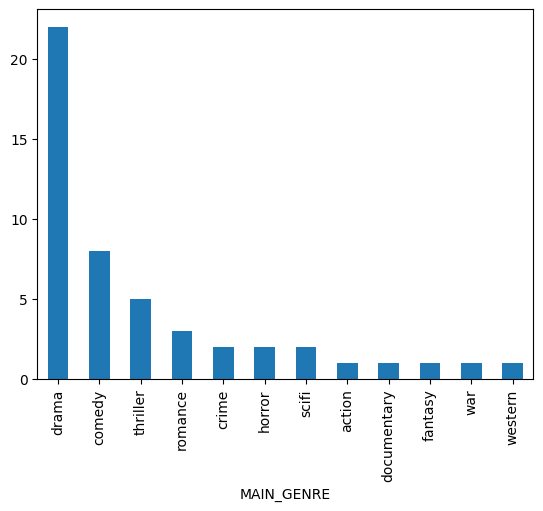

In [11]:
# Best Genres
best_movie_by_year_df.value_counts('MAIN_GENRE').plot(kind='bar')

Now that's a bit surprising. I was expecting comedy and war to be the most highly rated. 
- Comedy because they are easily accepted by a large populace, versus thrillers or scifi, etc. 
- War because many of the early films were about war (early 60s-80s) 

<AxesSubplot: xlabel='num_words'>

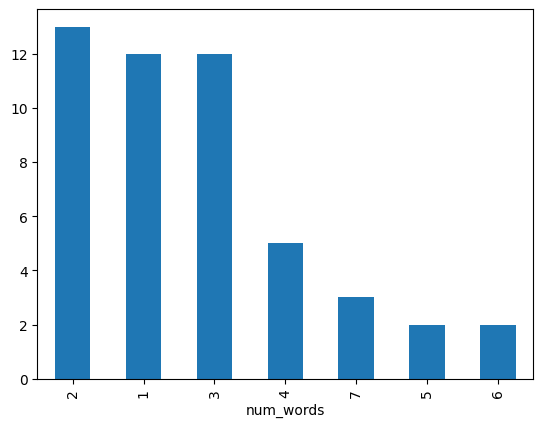

In [12]:
# Average number of words for a title
best_movie_by_year_df['num_words'] = best_movie_by_year_df.TITLE.str.split(' ').apply(len)

best_movie_by_year_df.value_counts('num_words').plot(kind='bar')

Looks like most titles have 1-3 words. Surprisingly the next jump is 7 words! Let's checkout a few 1-3 word samples, and a few 7 word samples

In [13]:
words_1_to_3 = best_movie_by_year_df[(1 <= best_movie_by_year_df['num_words']) & (best_movie_by_year_df['num_words'] <= 3)]
words_1_to_3.sort_values('RELEASE_YEAR')[::-1]

,TITLE,RELEASE_YEAR,SCORE,MAIN_GENRE,MAIN_PRODUCTION,num_words
48,The Tinder Swindler,2022,7.2,crime,GB,3
47,Bo Burnham: Inside,2021,8.7,comedy,US,3
44,Andhadhun,2018,8.2,thriller,IN,1
42,Dangal,2016,8.4,action,IN,1
41,Drishyam,2015,8.2,thriller,IN,1
40,Queen,2014,8.2,drama,IN,1
39,Rush,2013,8.1,drama,US,1
38,Django Unchained,2012,8.4,western,US,2
37,Warrior,2011,8.2,drama,US,1
36,Inception,2010,8.8,scifi,GB,1


In [14]:
def plot_scatter_with_title(df, figsize=(15, 15)):
    plt.figure(figsize=figsize)
    plt.scatter(df.RELEASE_YEAR, df.SCORE, label=df.TITLE)
    for i in range(len(df)):
        plt.annotate(df.TITLE.iloc[i], (df.RELEASE_YEAR.iloc[i], df.SCORE.iloc[i]))

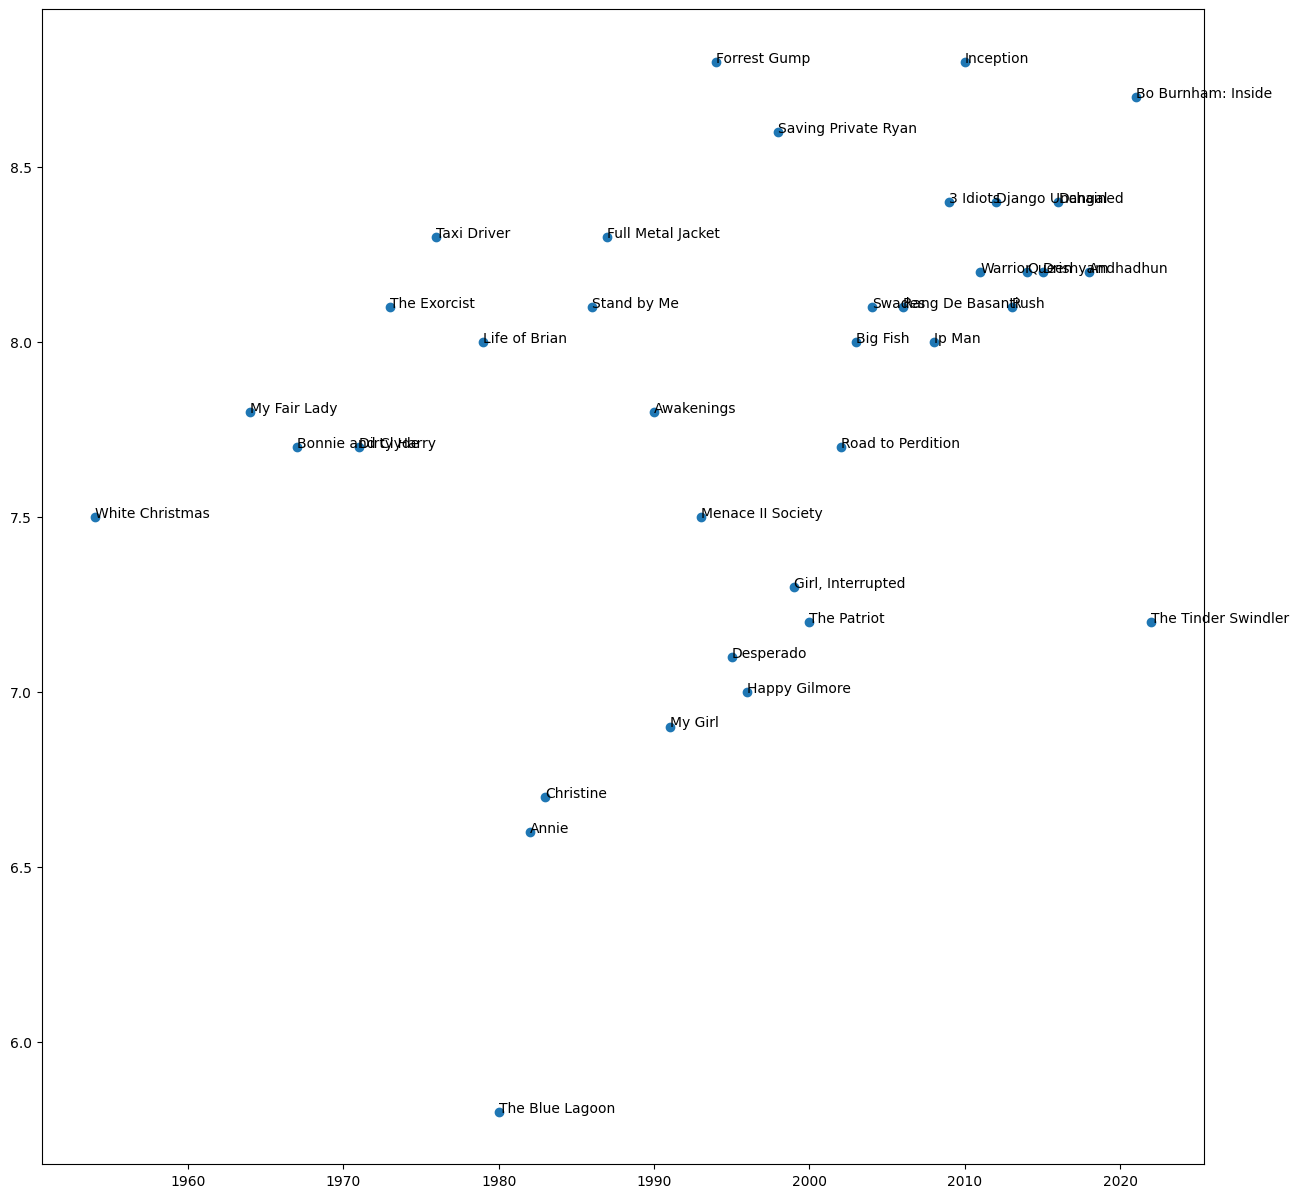

In [15]:
plot_scatter_with_title(words_1_to_3)

In [16]:
# Whether title includes ":", e.g. a subtitle of sorts
title_with_colon = best_movie_by_year_df[best_movie_by_year_df['num_words'] == 7]
title_with_colon.head()

,TITLE,RELEASE_YEAR,SCORE,MAIN_GENRE,MAIN_PRODUCTION,num_words
23,Neon Genesis Evangelion: The End of Evangelion,1997,8.0,scifi,JP,7
27,Lagaan: Once Upon a Time in India,2001,8.1,drama,IN,7
46,David Attenborough: A Life on Our Planet,2020,9.0,documentary,GB,7


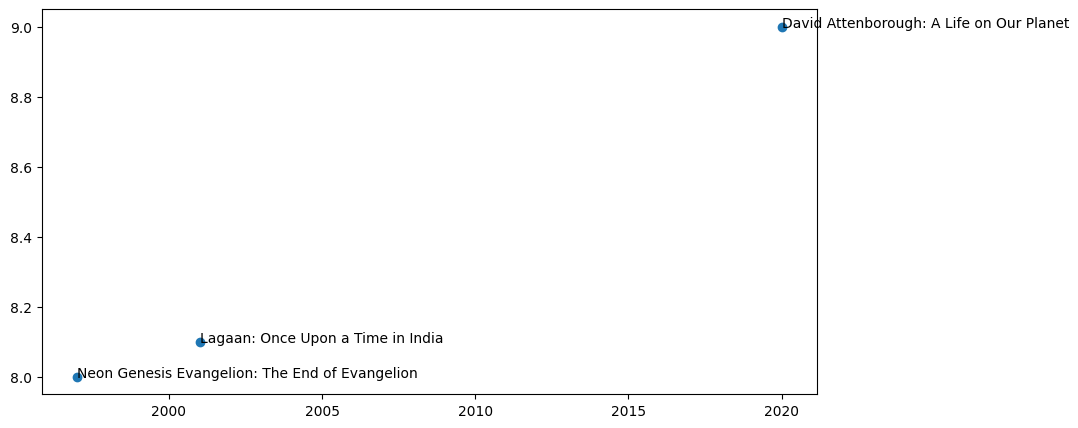

In [17]:
plot_scatter_with_title(title_with_colon, figsize=(10, 5))

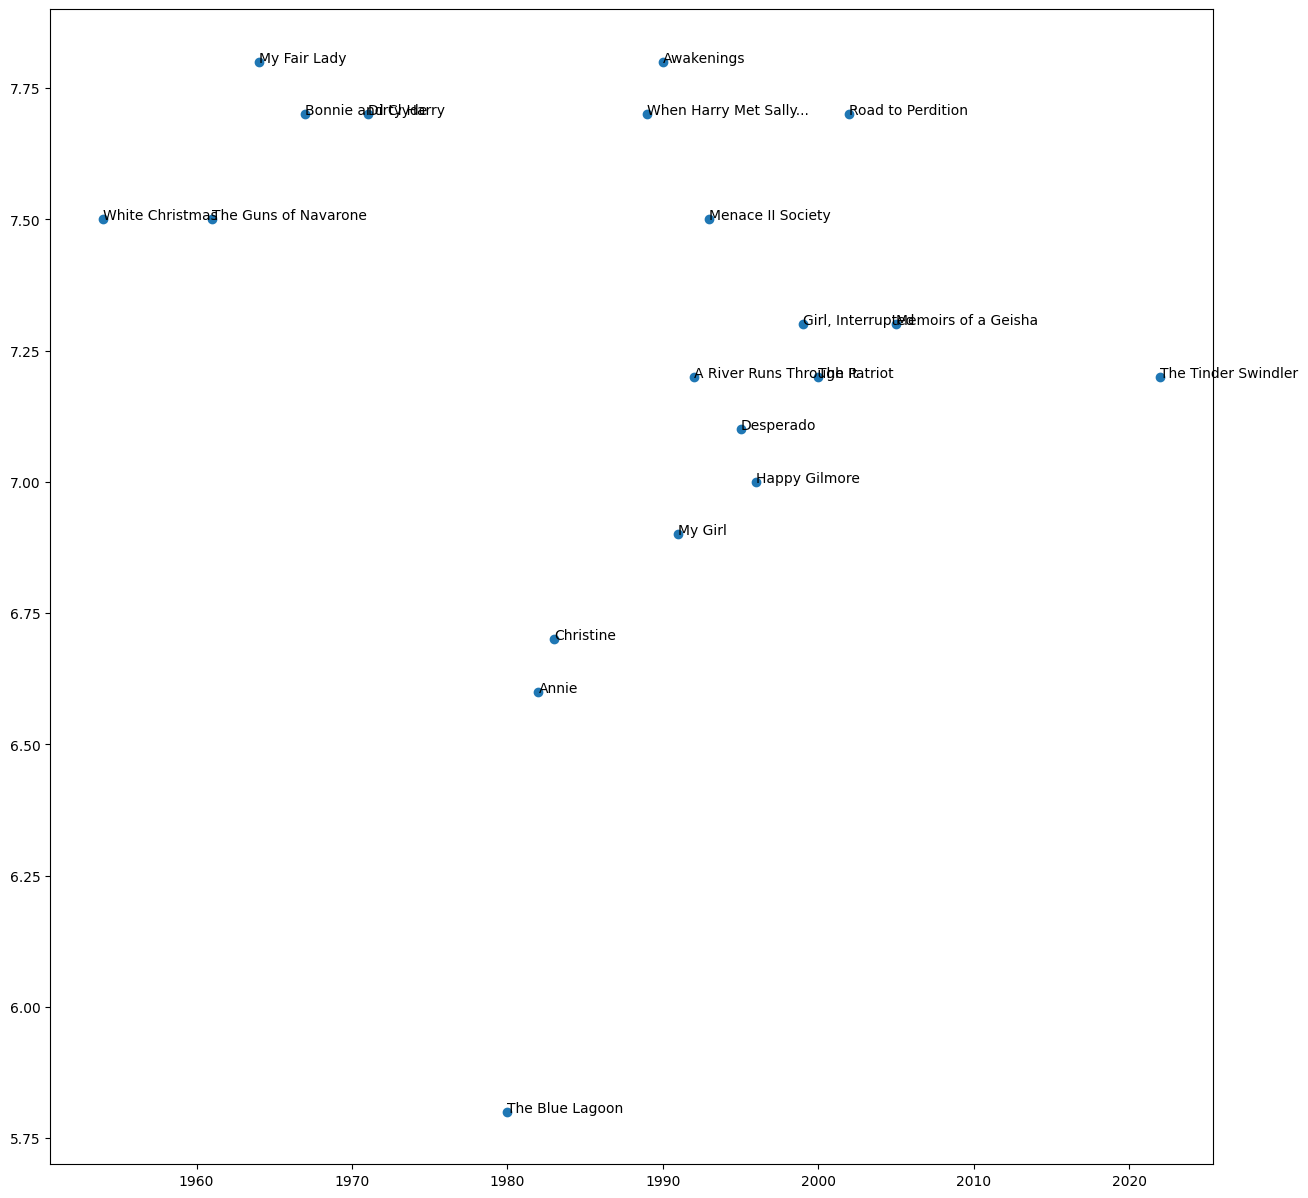

In [18]:
# What about lowest ranking titles
plot_scatter_with_title(best_movie_by_year_df.sort_values('SCORE').iloc[:20])

# Best Movies Netflix

In [19]:
best_movies_df.head()

,index,TITLE,RELEASE_YEAR,SCORE,NUMBER_OF_VOTES,DURATION,MAIN_GENRE,MAIN_PRODUCTION
0,0,David Attenborough: A Life on Our Planet,2020,9.0,31180,83,documentary,GB
1,1,Inception,2010,8.8,2268288,148,scifi,GB
2,2,Forrest Gump,1994,8.8,1994599,142,drama,US
3,3,Anbe Sivam,2003,8.7,20595,160,comedy,IN
4,4,Bo Burnham: Inside,2021,8.7,44074,87,comedy,US


<AxesSubplot: xlabel='RELEASE_YEAR'>

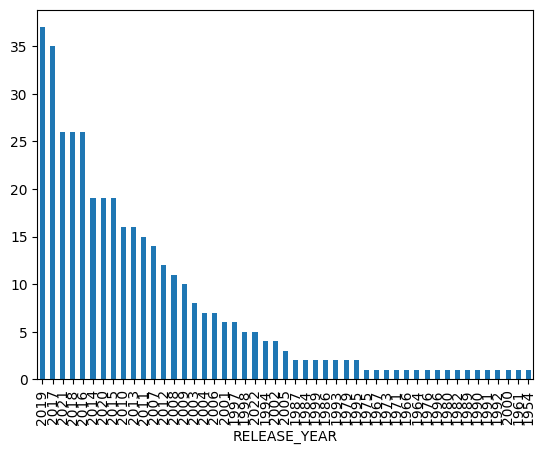

In [20]:
best_movies_df.value_counts('RELEASE_YEAR').plot(kind='bar')

<AxesSubplot: xlabel='SCORE'>

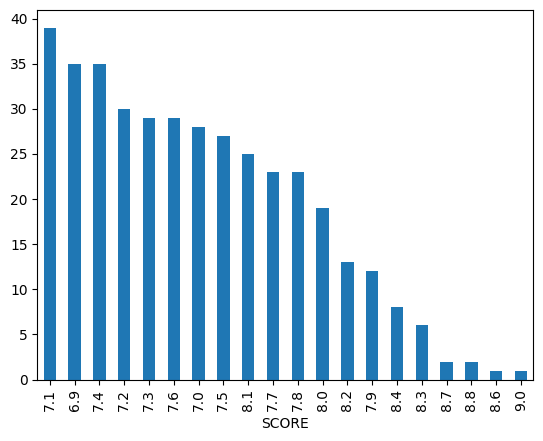

In [21]:
best_movies_df.value_counts('SCORE').plot(kind='bar')

<AxesSubplot: >

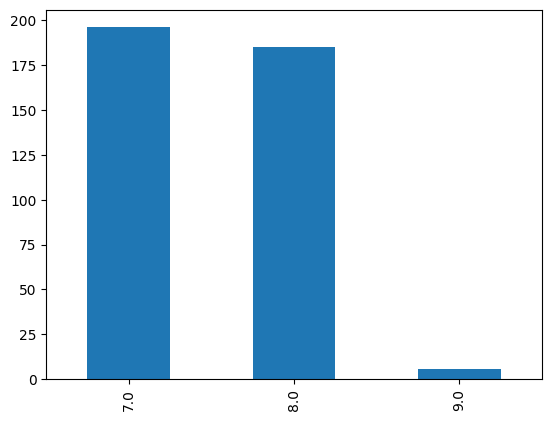

In [22]:
best_movies_df.SCORE.round().value_counts().plot(kind='bar')

<AxesSubplot: xlabel='SCORE'>

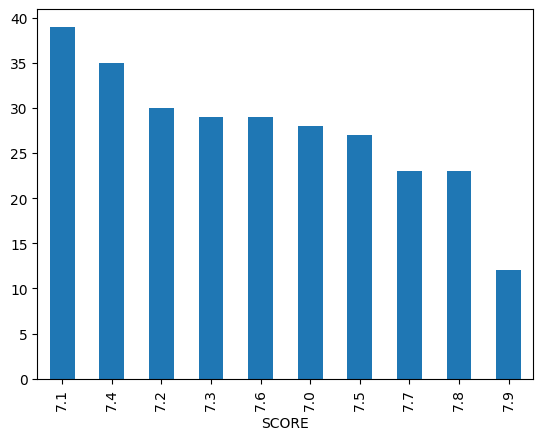

In [23]:
best_movies_df[(best_movies_df.SCORE >= 7.0) & (best_movies_df.SCORE < 8.0)].value_counts('SCORE').plot(kind='bar')

<AxesSubplot: xlabel='SCORE'>

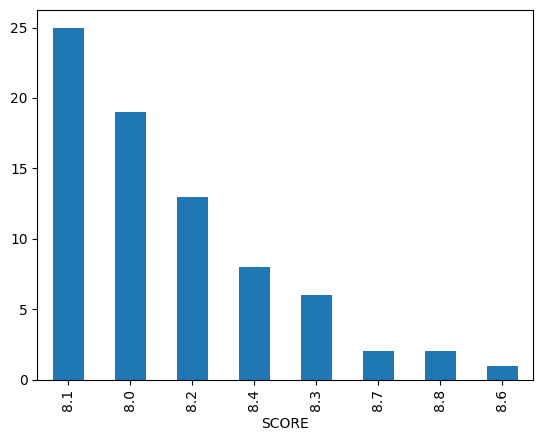

In [24]:
best_movies_df[(best_movies_df.SCORE >= 8.0) & (best_movies_df.SCORE < 9.0)].value_counts('SCORE').plot(kind='bar')

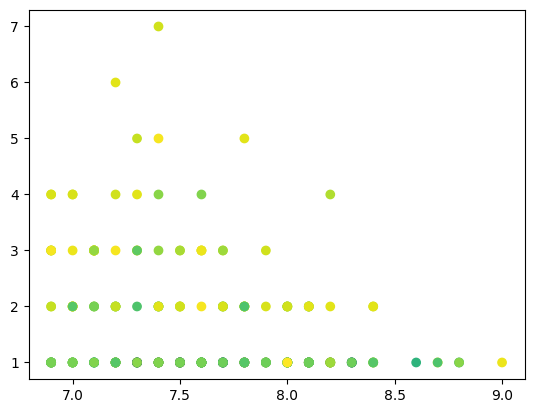

In [25]:
year_to_score = best_movies_df.value_counts(['RELEASE_YEAR', 'SCORE']).to_frame('count').reset_index()
plt.scatter(year_to_score.SCORE, year_to_score['count'], c=year_to_score.RELEASE_YEAR)

<AxesSubplot: xlabel='MAIN_GENRE'>

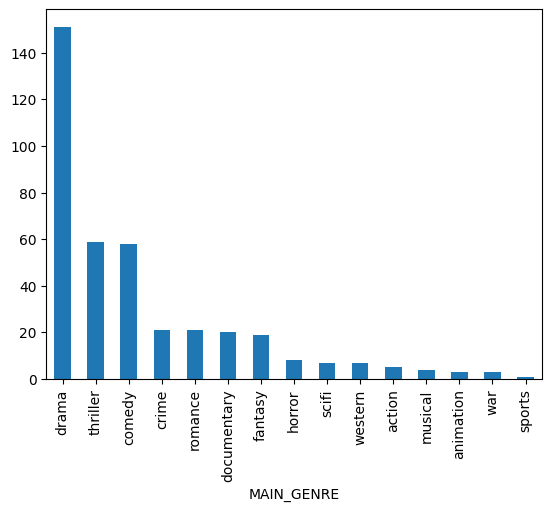

In [26]:
best_movies_df.value_counts('MAIN_GENRE').plot(kind='bar')

<AxesSubplot: >

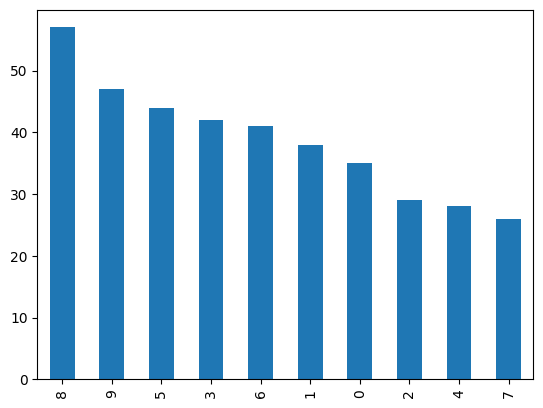

In [27]:
(best_movies_df.NUMBER_OF_VOTES % 10).value_counts().plot(kind='bar')

<AxesSubplot: >

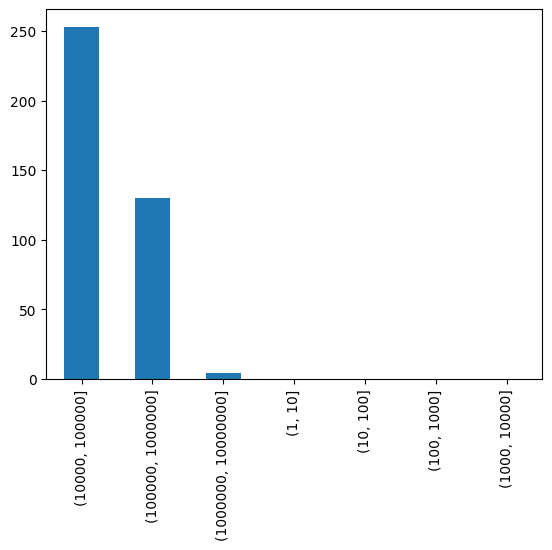

In [28]:
pd.cut(best_movies_df.NUMBER_OF_VOTES, [10**i for i in range(8)]).value_counts().plot(kind='bar')

<AxesSubplot: >

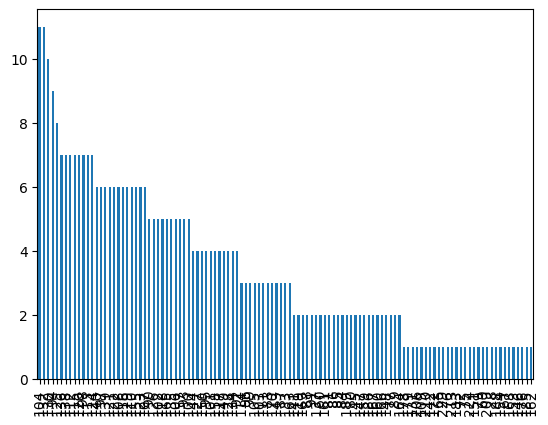

In [29]:
best_movies_df.DURATION.value_counts().plot(kind='bar')

In [30]:
best_movies_df.DURATION.max(), best_movies_df.DURATION.min()

(229, 28)

<AxesSubplot: >

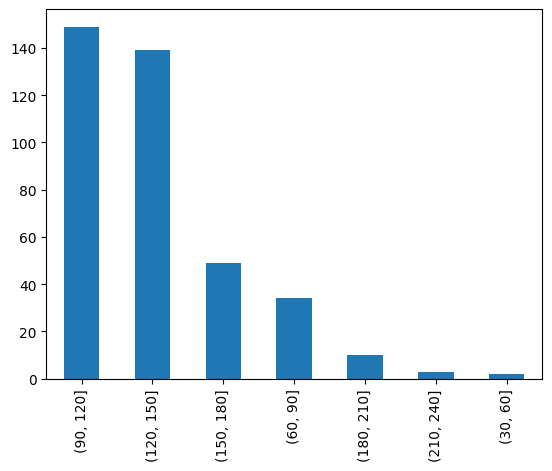

In [31]:
pd.cut(best_movies_df.DURATION, list(np.arange(30, 270, 30))).value_counts().plot(kind='bar')

<AxesSubplot: >

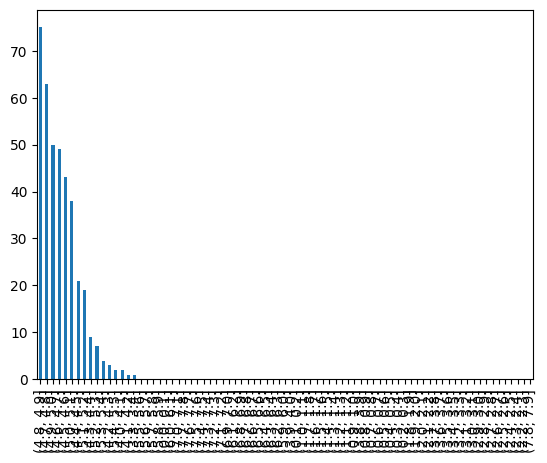

In [32]:
pd.cut(np.log(best_movies_df.DURATION), list(np.arange(0.0, 8.0, 0.1))).value_counts().plot(kind='bar')

<AxesSubplot: >

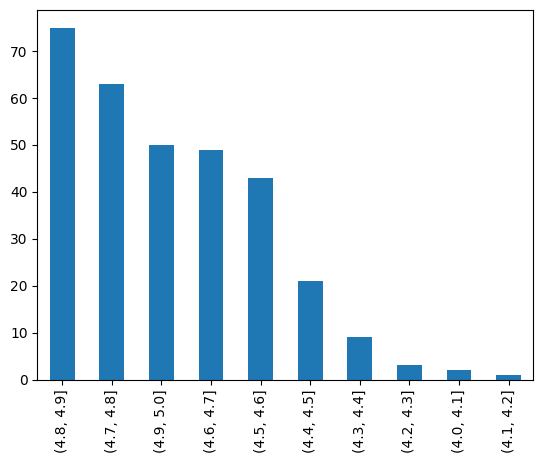

In [33]:
pd.cut(np.log(best_movies_df.DURATION), list(np.arange(4.0, 5.1, 0.1))).value_counts().plot(kind='bar')

/var/folders/g4/pxngykv555x357p3t84y0wdh0000gn/T/ipykernel_6983/4046978931.py:5: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  fig.tight_layout(pad=10)


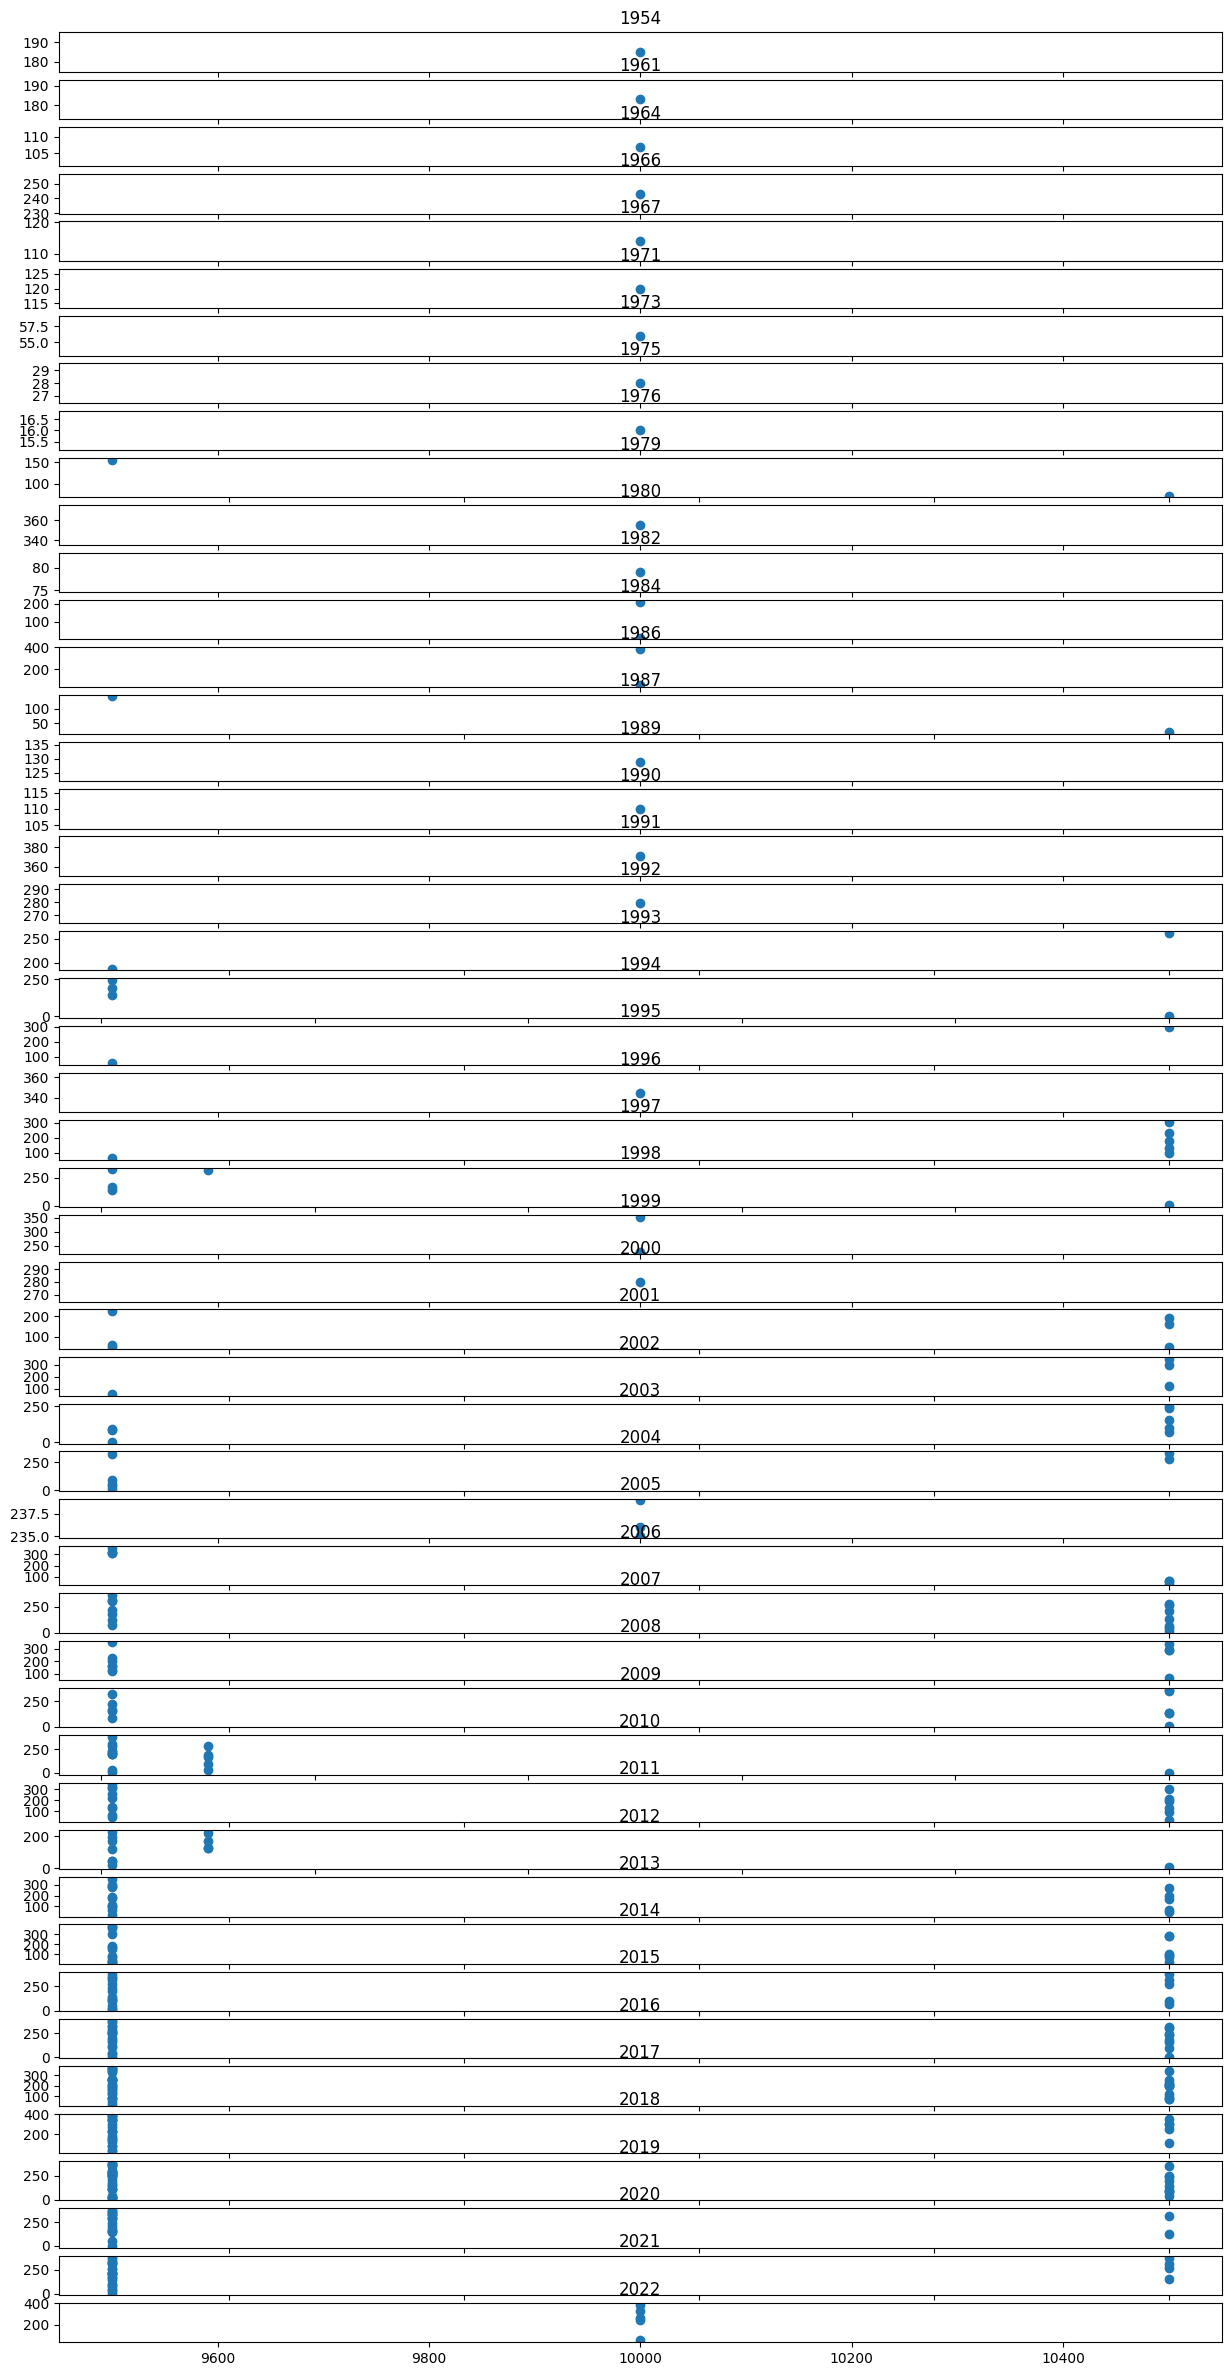

In [34]:
year_to_votes = best_movies_df.groupby('RELEASE_YEAR').apply(lambda x: pd.cut(x.NUMBER_OF_VOTES, [10**i for i in range(8)])).to_frame('bucket').reset_index()
year_to_votes['bucket'] = year_to_votes['bucket'].map(lambda x: x.left)

fig, ax = plt.subplots(len(year_to_votes.RELEASE_YEAR.unique()), 1, clear=True)
fig.tight_layout(pad=10)
fig.set_size_inches(15, 30)
for i, year in enumerate(year_to_votes.RELEASE_YEAR.unique()):
    curr = year_to_votes[year_to_votes['RELEASE_YEAR'] == year]
    ax[i].scatter('bucket', 'level_1', data=curr)
    ax[i].set_title(year)

plt.show()

# Best Shows By Year

In [35]:
best_shows_by_year_df.head()

,index,TITLE,RELEASE_YEAR,SCORE,NUMBER_OF_VOTES,DURATION,NUMBER_OF_SEASONS,MAIN_GENRE,MAIN_PRODUCTION
0,0,Breaking Bad,2008,9.5,1727694,48,5,drama,US
1,1,Avatar: The Last Airbender,2005,9.3,297336,24,3,scifi,US
2,2,Our Planet,2019,9.3,41386,50,1,documentary,GB
3,3,Kota Factory,2019,9.3,66985,42,2,drama,IN
4,4,The Last Dance,2020,9.1,108321,50,1,documentary,US


# Best Shows

In [36]:
best_shows_df.head()

,index,TITLE,RELEASE_YEAR,SCORE,NUMBER_OF_VOTES,DURATION,NUMBER_OF_SEASONS,MAIN_GENRE,MAIN_PRODUCTION
0,0,Breaking Bad,2008,9.5,1727694,48,5,drama,US
1,1,Avatar: The Last Airbender,2005,9.3,297336,24,3,scifi,US
2,2,Our Planet,2019,9.3,41386,50,1,documentary,GB
3,3,Kota Factory,2019,9.3,66985,42,2,drama,IN
4,4,The Last Dance,2020,9.1,108321,50,1,documentary,US


In [37]:
best_shows_df.head()

,index,TITLE,RELEASE_YEAR,SCORE,NUMBER_OF_VOTES,DURATION,NUMBER_OF_SEASONS,MAIN_GENRE,MAIN_PRODUCTION
0,0,Breaking Bad,2008,9.5,1727694,48,5,drama,US
1,1,Avatar: The Last Airbender,2005,9.3,297336,24,3,scifi,US
2,2,Our Planet,2019,9.3,41386,50,1,documentary,GB
3,3,Kota Factory,2019,9.3,66985,42,2,drama,IN
4,4,The Last Dance,2020,9.1,108321,50,1,documentary,US


In [38]:
raw_credits_df.head()

,index,person_id,id,name,character,role
0,0,3748,tm84618,Robert De Niro,Travis Bickle,ACTOR
1,1,14658,tm84618,Jodie Foster,Iris Steensma,ACTOR
2,2,7064,tm84618,Albert Brooks,Tom,ACTOR
3,3,3739,tm84618,Harvey Keitel,Matthew 'Sport' Higgins,ACTOR
4,4,48933,tm84618,Cybill Shepherd,Betsy,ACTOR


In [39]:
raw_titles_df.head()

,index,id,title,type,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes
0,0,ts300399,Five Came Back: The Reference Films,SHOW,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN
1,1,tm84618,Taxi Driver,MOVIE,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0
2,2,tm127384,Monty Python and the Holy Grail,MOVIE,1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0
3,3,tm70993,Life of Brian,MOVIE,1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0
4,4,tm190788,The Exorcist,MOVIE,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0
